In [2]:
import gymnasium as gym
import numpy as np

In [3]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False, render_mode='human')
states = env.observation_space.n
actions = env.action_space.n
print("States: ", states)
print("Actions: ", actions)


States:  64
Actions:  4


In [48]:
env.render()

ResetNeeded: Cannot call `env.render()` before calling `env.reset()`, if this is a intended action, set `disable_render_order_enforcing=True` on the OrderEnforcer wrapper.

In [36]:
env.close()

In [4]:
env.reset()
episodes = 10

for episode in range(episodes):
    state = env.reset()
    terminated, truncated = False, False
    score = 0
    steps_taken = 0

    while not terminated and not truncated:
        env.render()
        action = env.action_space.sample()
        n_state, reward, terminated, truncated, _ = env.step(action)
        score += reward
        steps_taken += 1
        if steps_taken > 20:
            truncated = True

    print("Episode: ", episode+1, "Score: ", score, "Steps taken: ", steps_taken)
    steps_taken = 0

env.close()

KeyboardInterrupt: 

In [5]:
q_table = np.zeros((states, actions))

print("Q-Table: \n", q_table)

Q-Table: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
env.reset()

(0, {'prob': 1})

In [68]:
env.close()

In [7]:
env.action_space.sample()

1

In [8]:
env.reset()
env.step(2)
env.render()

In [77]:
env.close()

In [9]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False, render_mode='human')
states = env.observation_space.n
actions = env.action_space.n
print("States: ", states)
print("Actions: ", actions)

States:  64
Actions:  4


In [11]:
from tqdm.auto import tqdm

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

q_table = np.zeros((states, actions))

# Hyperparameters
episodes = 400
alpha = 0.5
gamma = 0.9

# List of outcomes to plot
outcomes = []

print("Q-Table before training: \n", q_table)

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    outcomes.append(0)

    while not terminated and not truncated:
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state])

        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])

        state = new_state

        if reward:
            outcomes[-1] = 1

print()
print("!------------------------------------------------------------------------!")
print("Q-Table after training: \n", q_table)

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()


Q-Table before training: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


  0%|          | 0/400 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [14]:
env.close()

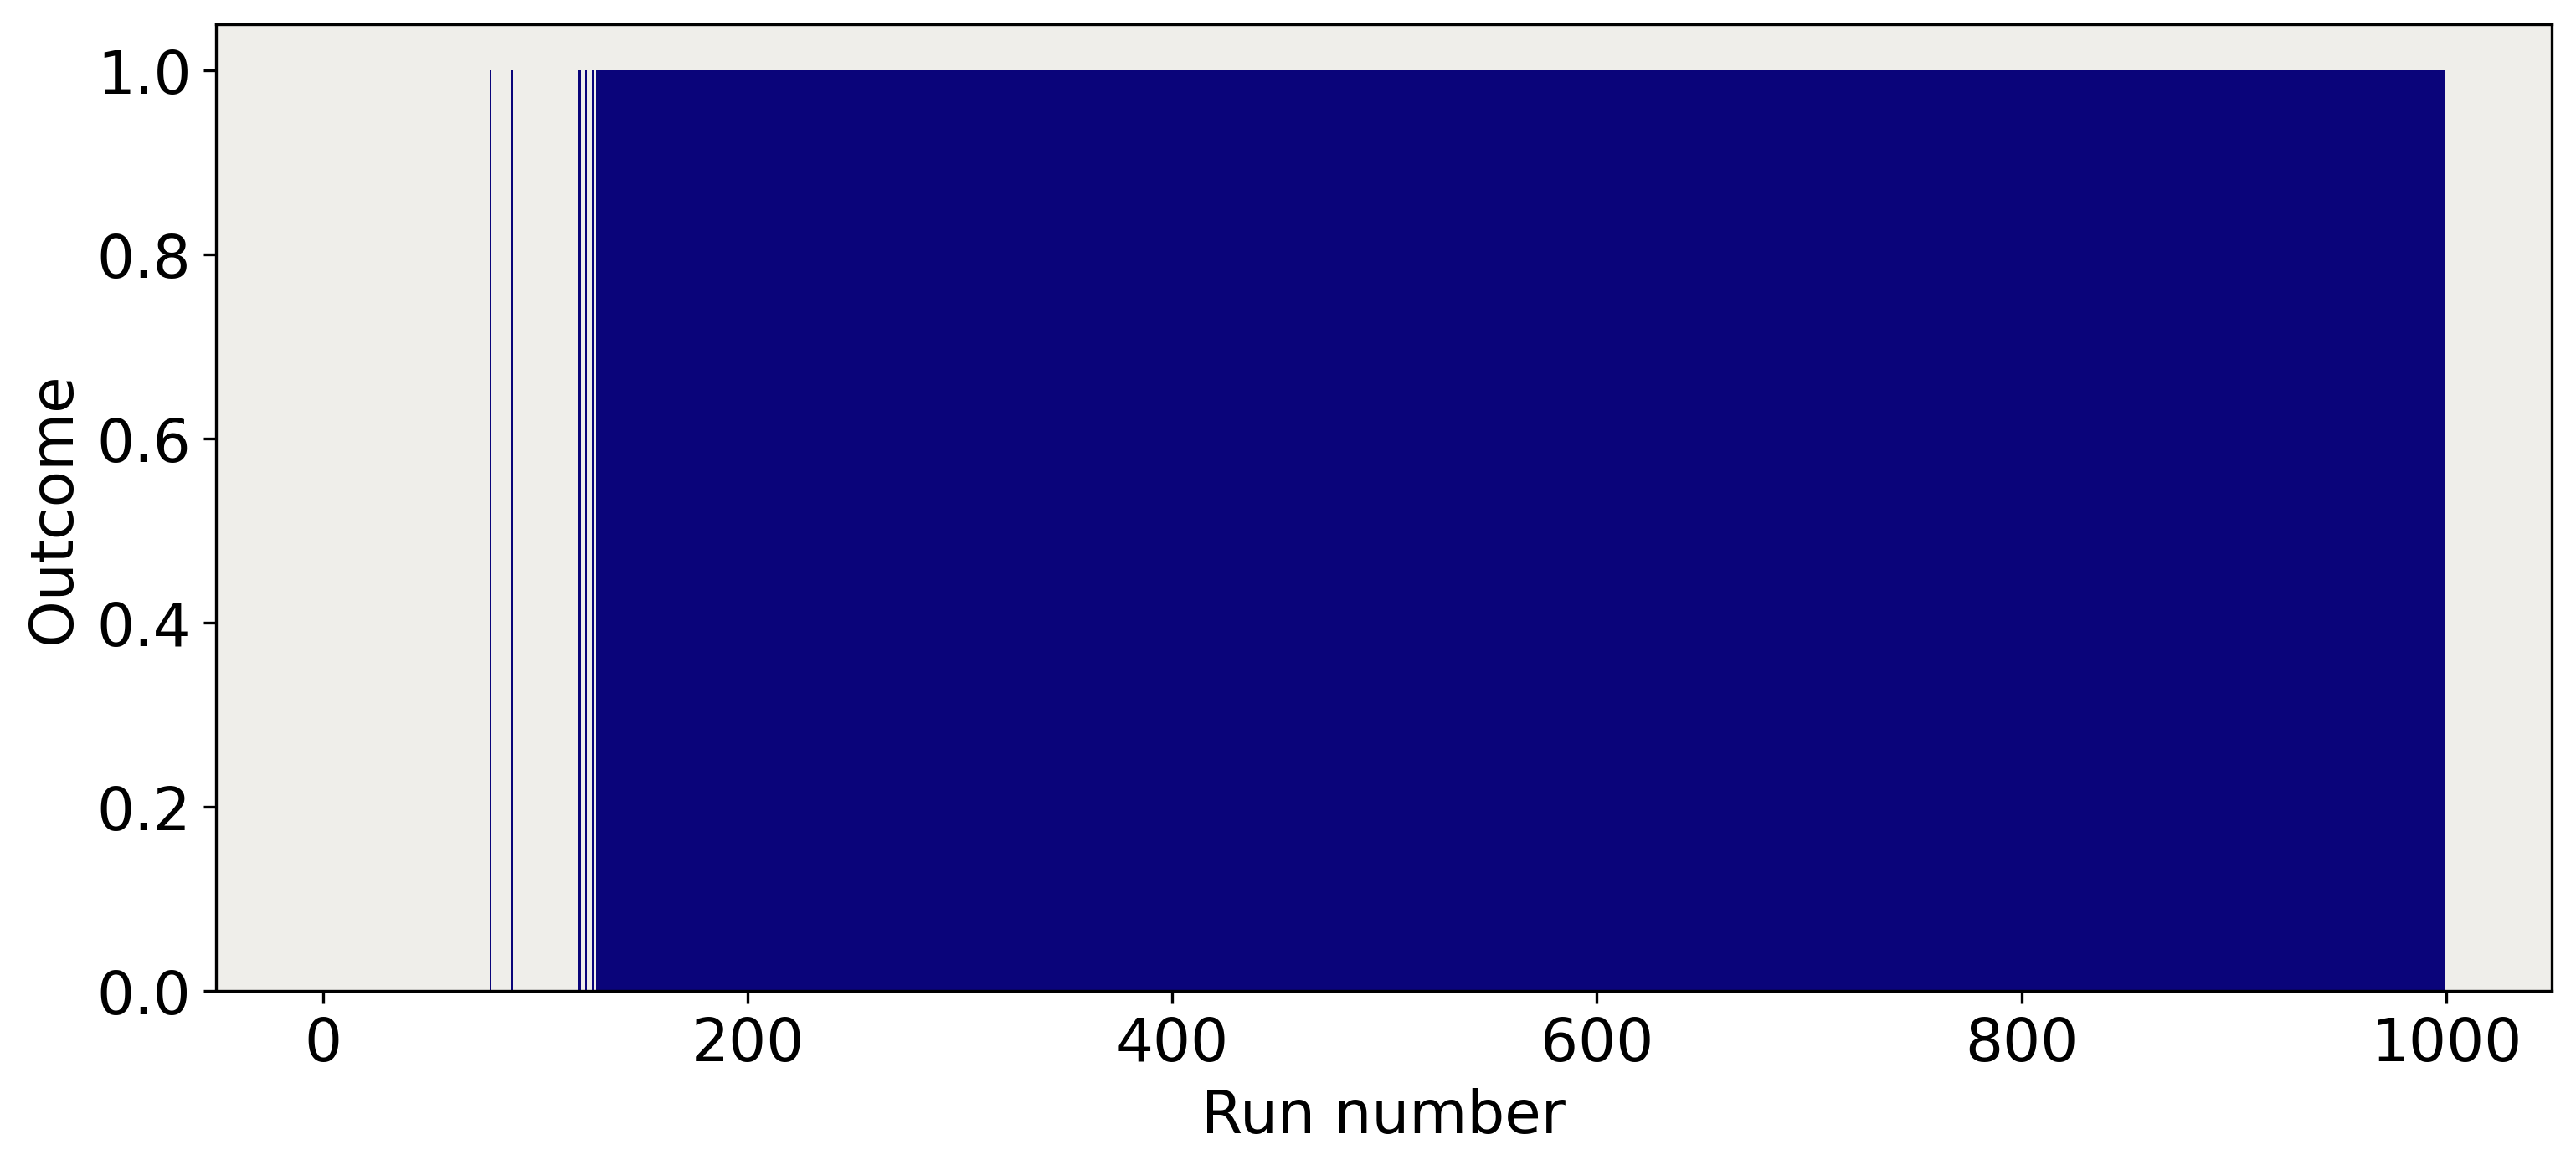

In [86]:
state = env.reset()
action = 2
state, reward, terminated, truncated, _ = env.step(action)
state

1

In [98]:
episodes = 100
nb_success = 0
env.render()

for episode in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state])
        
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

        nb_success += reward

print("Success rate: ", nb_success/episodes)

Success rate:  1.0


### Time for some epsilon greedy algorithm
The Q-Table above doesn't explore enought. Once a state-action pair starts having a non-zero value, the agent will always choose it. It doesn't consider the possibility of having better reward elsewhere.
We will now use epsilon greedy algorithm to maintain a balance between exploration (taking random actions) vs exploitation (referring the Q-Table)

Q-Table before training: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode:  1 Outcome:  Fail
Episode:  26 Outcome:  Fail
Episode:  51 Outcome:  Fail
Episode:  76 Outcome:  Fail
Episode:  101 Outcome:  Fail
Episode:  126 Outcome:  Fail
Episode:  151 Outcome:  Fail
Episode:  176 Outcome:  Fail
Episode:  201 Outcome:  Fail
Episode:  226 Outcome:  Fail
Episode:  251 Outcome:  Fail
Episode:  276 Outcome:  Fail
Episode:  301 Outcome:  Fail
Episode:  326 Outcome:  Fail
Episode:  351 Outcome:  Fail
Episode:  376 Outcome:  Fail
Episode:  401 Outcome:  Fail
Episode:  426 Outcome:  Fail
Episode:  451 Outcome:  Success
Episode:  476 Outcome:  Success
Episode:  501 Outcome:  Fail
Episode:  526 Outcome:  Success
Episode:  551 Outcome:  Success
Episode:  576 Outcome:  Success
Episode:  601 Outcome:  Su

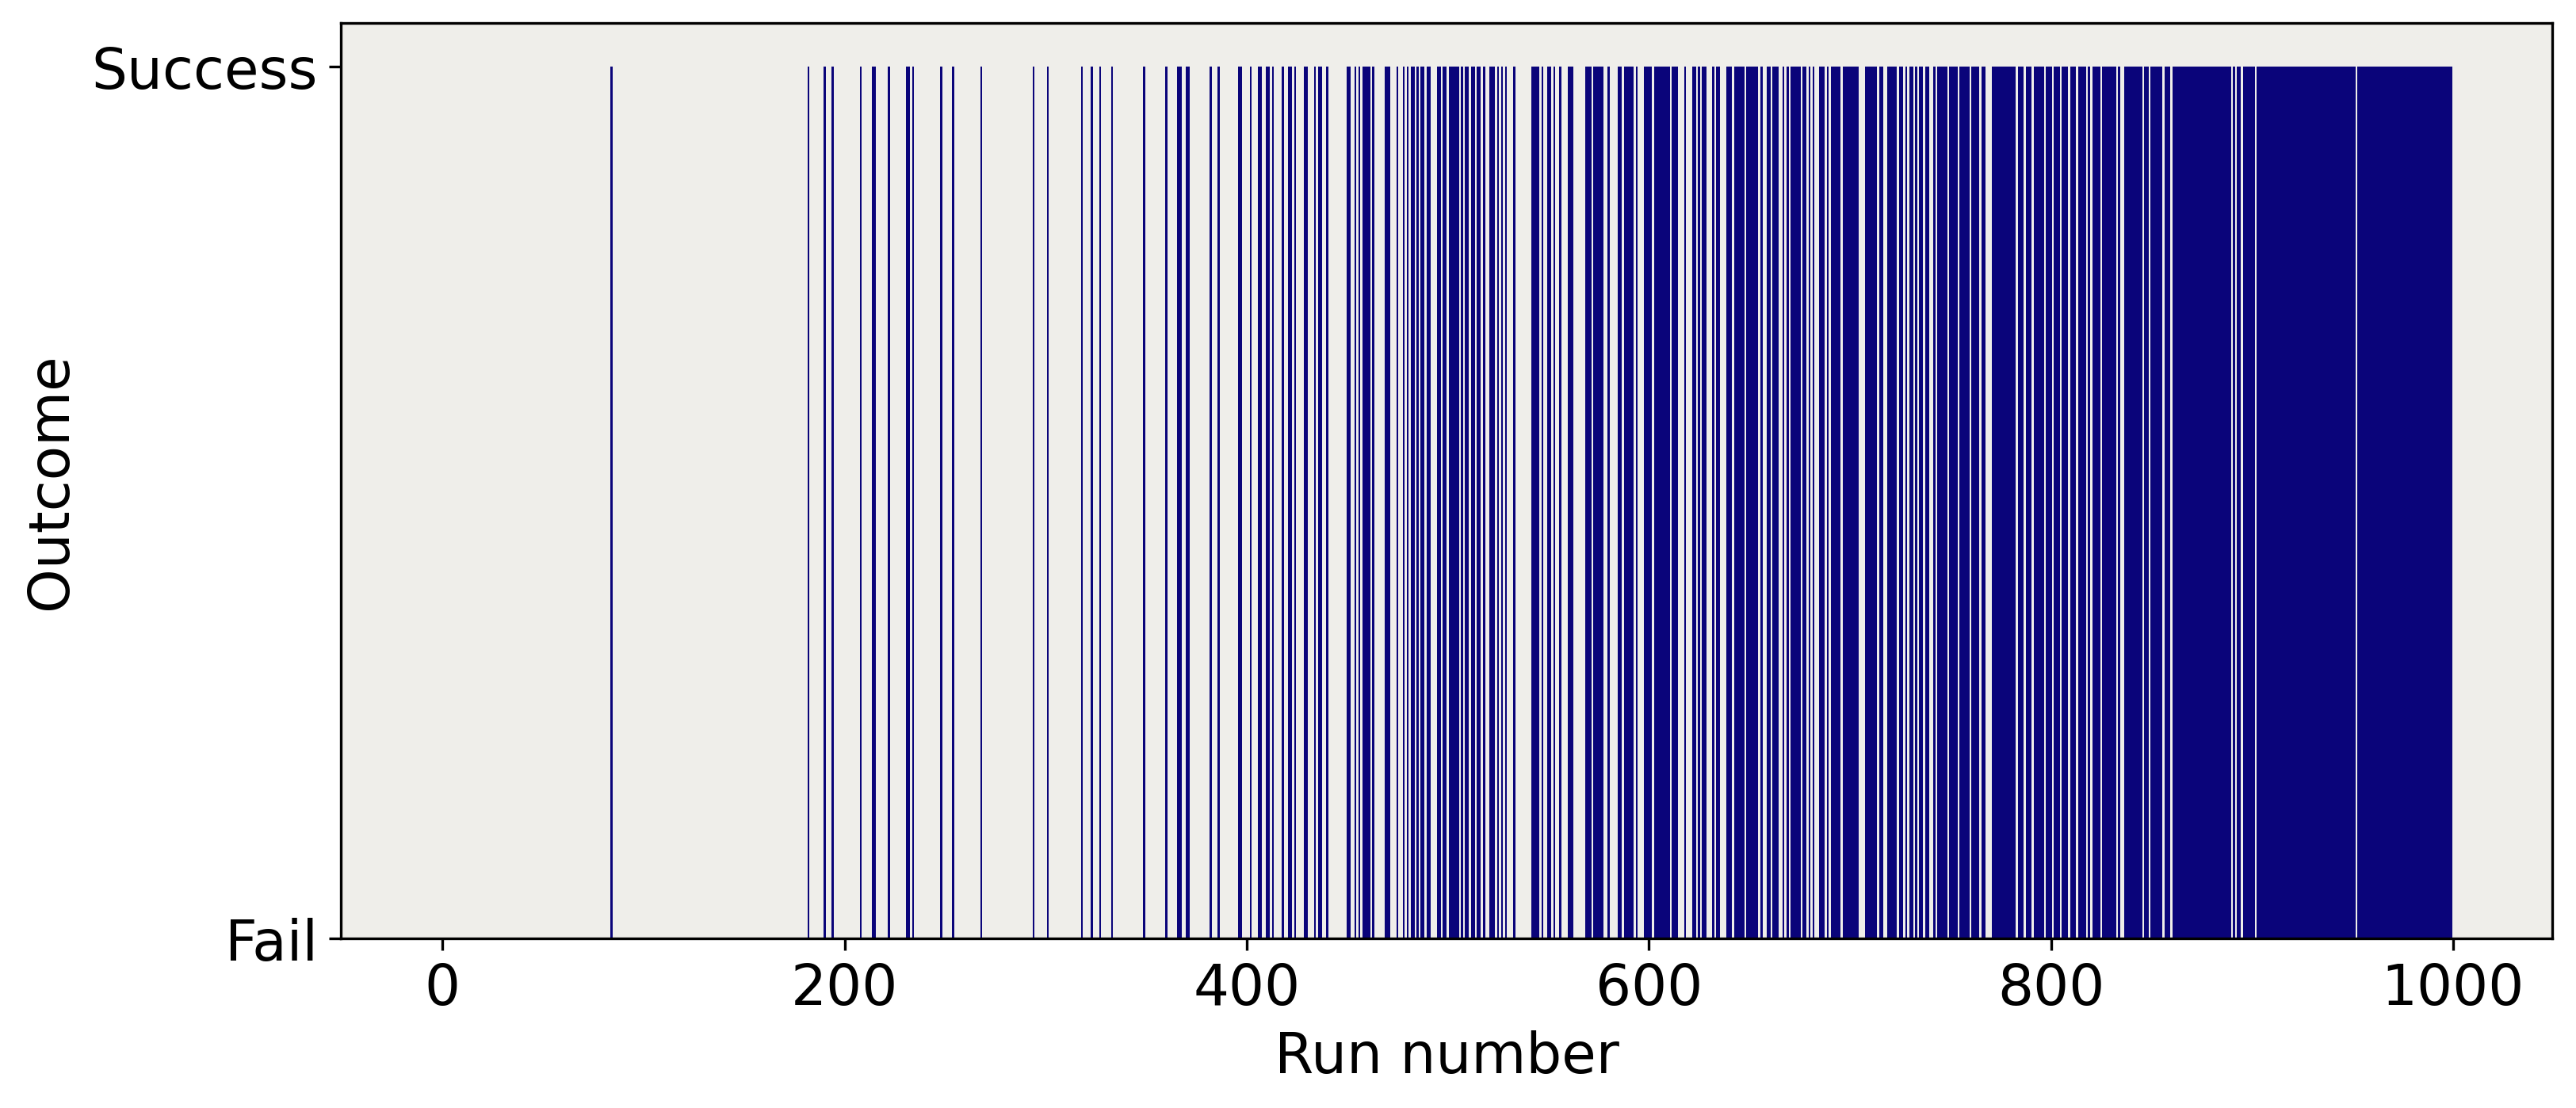

In [103]:
q_table = np.zeros((states, actions))

# Hyperparameters
episodes = 1000         # Number of episodes
alpha = 0.5             # Learning rate
gamma = 0.9             # Discount factor
epsilon = 1.0           # Exploration rate
epsilon_decay = 0.001   # Decay rate

# List of outcomes to plot
outcomes = []

print("Q-Table before training: \n", q_table)

for episode in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False

    outcomes.append("Fail")

    while not terminated and not truncated:
        random_number = np.random.random()
        steps = 0

        if random_number < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        new_state, reward, terminated, truncated, _ = env.step(action)
        steps += 1

        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])

        state = new_state

        if steps > 40:
            truncated = True

        if reward:
            outcomes[-1] = "Success"

    epsilon = epsilon - epsilon_decay

    if episode % 25 == 0:
        print("Episode: ", episode+1, "Outcome: ", outcomes[-1])

print()
print("!------------------------------------------------------------------------!")
print("Q-Table after training: \n", q_table)

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [106]:
!pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
from tqdm.auto import tqdm

In [109]:
episodes = 100
nb_success = 0

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state])
        
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

        nb_success += reward

print(f"Success rate: {nb_success/episodes*100}")


  0%|          | 0/100 [00:00<?, ?it/s]

Success rate: 100.0


In [111]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode='human')
env.reset()

states = env.observation_space.n
actions = env.action_space.n

q_table_new = q_table

episodes = 100
nb_success = 0

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        if np.max(q_table_new[state]) > 0:
            action = np.argmax(q_table_new[state])
        
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

        nb_success += reward

print(f"Success rate: {nb_success/episodes*100}")

  0%|          | 0/100 [00:00<?, ?it/s]

Success rate: 5.0


Q-Table before training: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


  0%|          | 0/1000 [00:00<?, ?it/s]


!------------------------------------------------------------------------!
Q-Table after training: 
 [[0.08915146 0.04925898 0.0502468  0.05151517]
 [0.03852196 0.00354669 0.01632621 0.04492053]
 [0.03144056 0.07017825 0.01686231 0.02501725]
 [0.02086619 0.01032889 0.02236297 0.03556335]
 [0.15676214 0.06739574 0.07404707 0.08173719]
 [0.         0.         0.         0.        ]
 [0.01869956 0.01626753 0.1089848  0.01172005]
 [0.         0.         0.         0.        ]
 [0.13312002 0.01343192 0.05128897 0.33065135]
 [0.13417124 0.46006237 0.10485189 0.08809362]
 [0.40142852 0.05102806 0.17136316 0.11185349]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.2070945  0.08322561 0.68283346 0.23038197]
 [0.29503751 0.49757707 0.83816483 0.28968458]
 [0.         0.         0.         0.        ]]


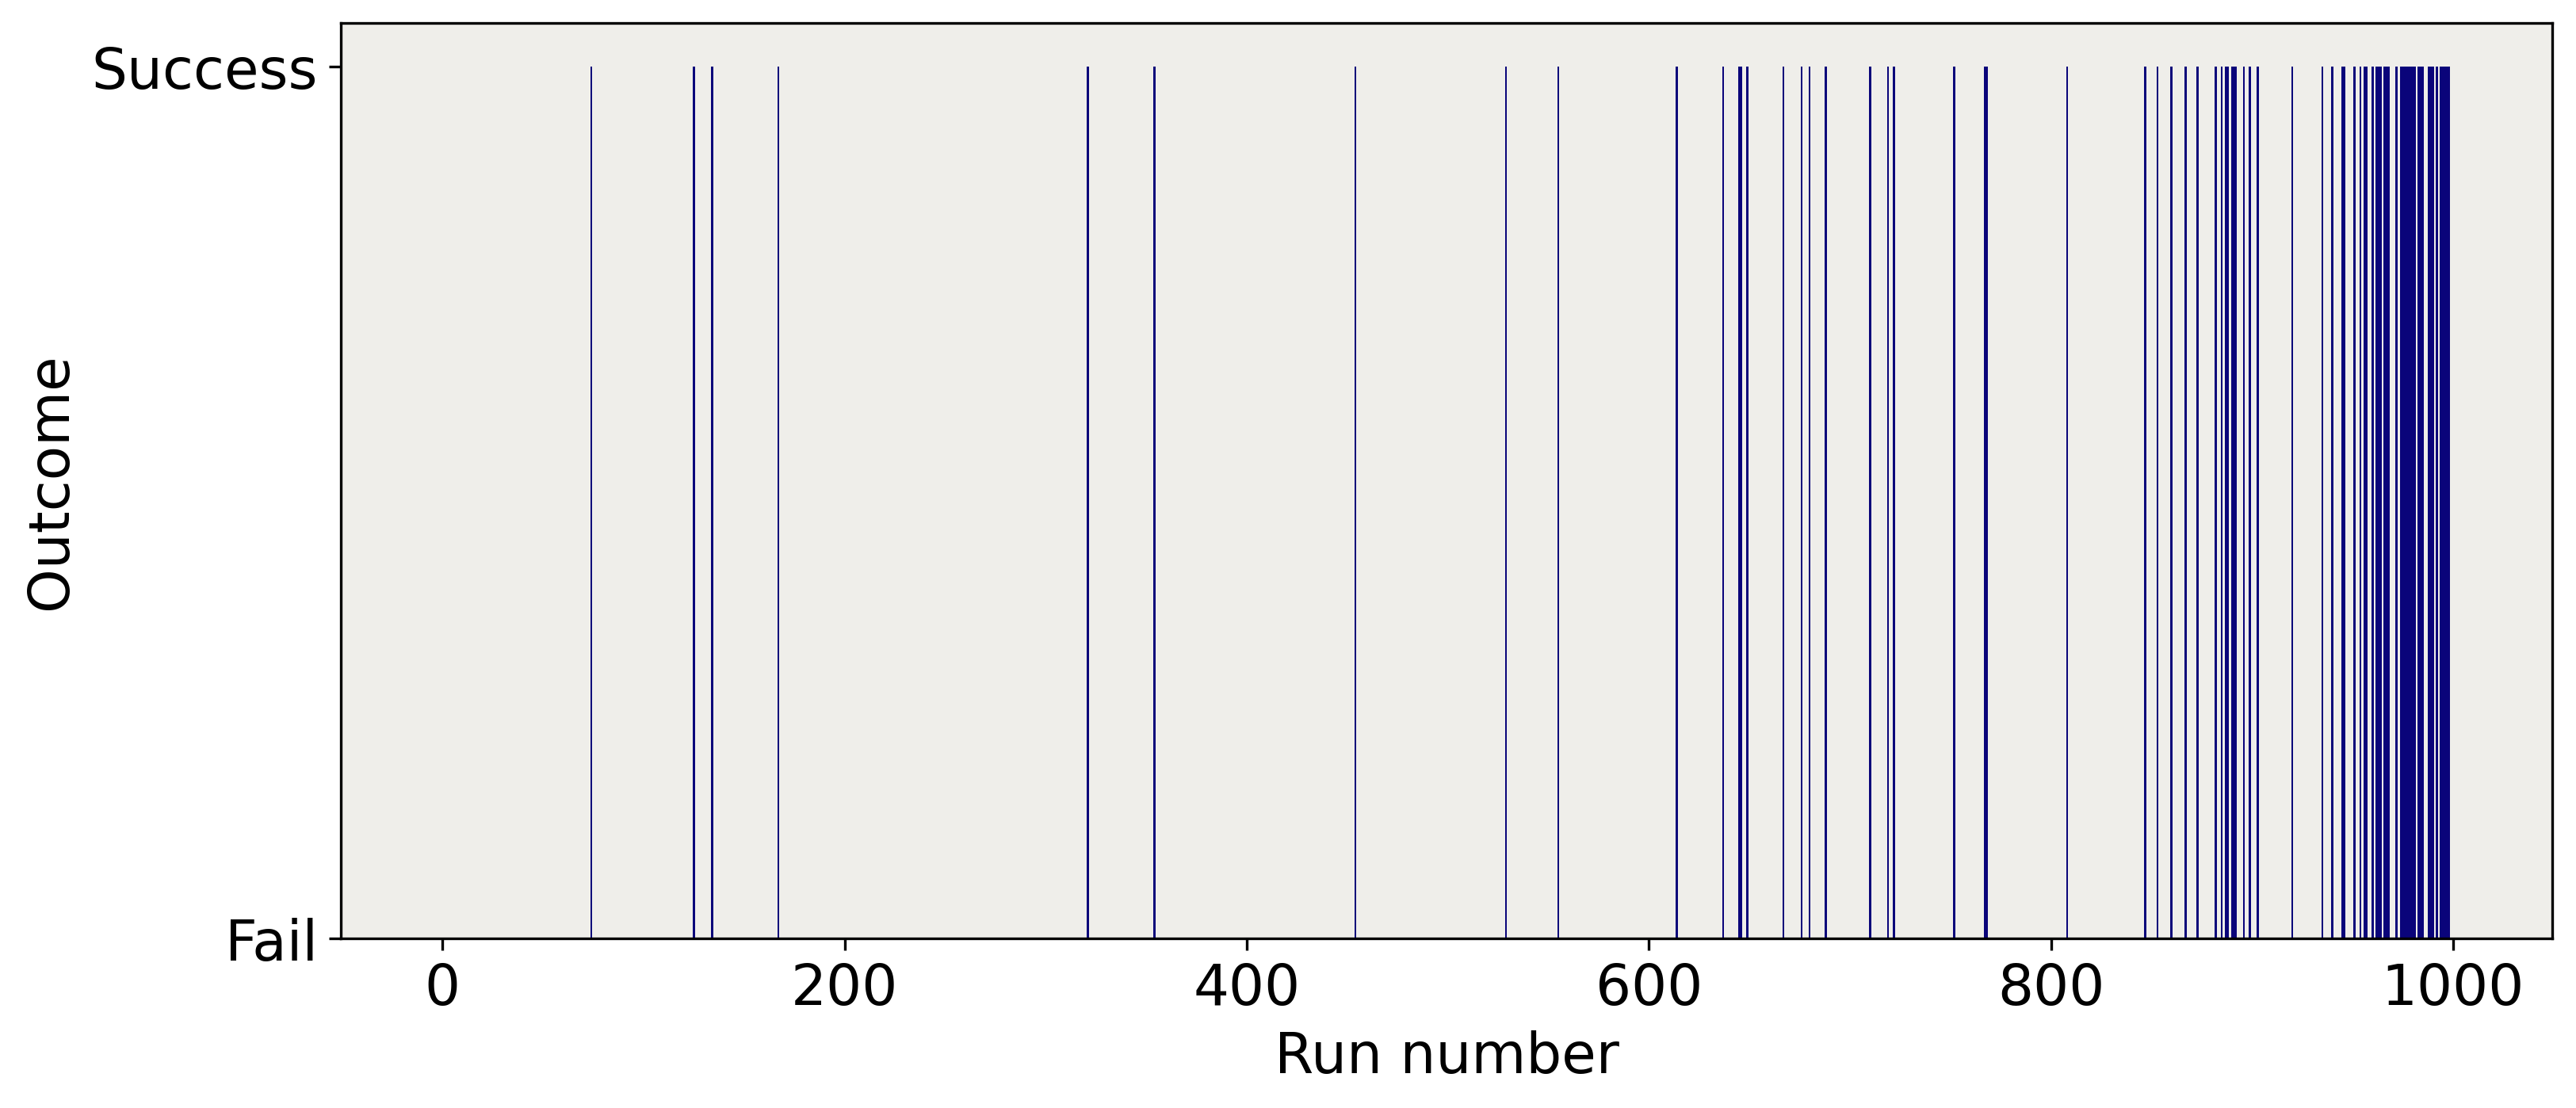

In [112]:
q_table_new = np.zeros((states, actions))

# Hyperparameters
episodes = 1000         # Number of episodes
alpha = 0.5             # Learning rate
gamma = 0.9             # Discount factor
epsilon = 1.0           # Exploration rate
epsilon_decay = 0.001   # Decay rate

# List of outcomes to plot
outcomes = []

print("Q-Table before training: \n", q_table_new)

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    outcomes.append("Fail")

    while not terminated and not truncated:
        random_number = np.random.random()
        steps = 0

        if random_number < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table_new[state])

        new_state, reward, terminated, truncated, _ = env.step(action)
        steps += 1

        q_table_new[state, action] = q_table_new[state, action] + alpha * (reward + gamma * np.max(q_table_new[new_state]) - q_table_new[state, action])

        state = new_state

        if steps > 40:
            truncated = True

        if reward:
            outcomes[-1] = "Success"

    epsilon = epsilon - epsilon_decay


print()
print("!------------------------------------------------------------------------!")
print("Q-Table after training: \n", q_table_new)

plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()


In [113]:
episodes = 100
nb_success = 0

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        if np.max(q_table_new[state]) > 0:
            action = np.argmax(q_table_new[state])
        
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

        nb_success += reward

print(f"Success rate: {nb_success/episodes*100}")

  0%|          | 0/100 [00:00<?, ?it/s]

Success rate: 62.0


In [116]:
episodes = 100
nb_success = 0

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        if np.max(q_table_new[state]) > 0:
            action = np.argmax(q_table_new[state])
        
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

        nb_success += reward



print(f"Success rate: {nb_success/episodes*100}")

  0%|          | 0/100 [00:00<?, ?it/s]

Success rate: 61.0


In [117]:
episodes = 100
nb_success = 0

for episode in tqdm(range(episodes)):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        if np.max(q_table_new[state]) > 0:
            action = np.argmax(q_table_new[state])
        
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, _ = env.step(action)

        state = new_state

        nb_success += reward

print(f"Success rate: {nb_success/episodes*100}")

  0%|          | 0/100 [00:00<?, ?it/s]

Success rate: 65.0
